**1.Reading the data**

In [120]:
#Loading the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Reading the CSV file is not possible beacause here the decoding is not supporting because the above CSV file is decoded with some different decodes so we have to choose the decode 


Due to UnicodeDecoderError: we are loading the data with the possible encoders below

In [96]:
#list of possible encodings to try
encoders=['cp1252','utf-8','latin1','ISO-8859-1']
file='spam.csv'

#now using loop we will do reading csv file with different encoders
for encoder in encoders:
    try:
        msg=pd.read_csv(file, encoding=encoder)
        print(f'file loaded with encoder: {encoder}')
        break # we are stopping the loop if it is loaded
    except UnicodeDecodeError:
        print(f'failed loading with encoder: {encoder}')
        continue #tries with the remaining decoders

#If the loop completes without success, msg will not be defined 
if 'msg' in locals():
    print('CSV is loaded, ready for process')
else:
    print('sorry, unable to load the CSV with these encoders')


file loaded with encoder: cp1252
CSV is loaded, ready for process


In [97]:
#to check the data 
msg.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [98]:
msg.shape

(5572, 5)

***1. Data PreProcessing***

In [99]:
msg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [100]:
#dropping the unwanted columns
msg.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)


In [101]:
msg.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [102]:
#names of the columns is not that much good
#renaming the column names

msg.rename(columns={'v1':'Label','v2':'Message'}, inplace=True)
msg

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [103]:
#importing the libraries
from sklearn.preprocessing import LabelEncoder
enc=LabelEncoder()

#labelencoder is used to change the spam and ham to 1 and 0, it is easier to understand 
msg['Label']=enc.fit_transform(msg['Label'])

msg.tail()

,Label,Message
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...
5571,0,Rofl. Its true to its name


In [104]:
#checking for null values
msg.isnull().sum()

Label      0
Message    0
dtype: int64

In [105]:
#checking for the duplicate values
msg.duplicated().sum()

403

In [106]:
#lets remove the duplicate values
msg=msg.drop_duplicates(keep='first')

#checking for duplicates again
msg.duplicated().sum()

0

Now the data is cleaned, now lets go for EDA (Exploratory Data Analysis)

***2. Exploratory Data Analysis***

In [107]:
#i want to know how many are spam(1) and ham(0)
msg['Label'].value_counts()

Label
0    4516
1     653
Name: count, dtype: int64

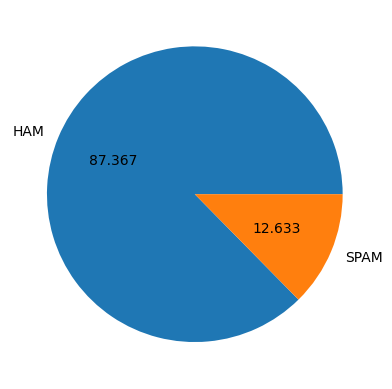

In [119]:
#visualising the above values

#pie plot
plt.pie(msg['Label'].value_counts(), labels=['HAM','SPAM'], autopct='%0.3f')
plt.show()

In [109]:
!pip install nltk


[notice] A new release of pip is available: 23.3.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [110]:
import nltk


In [111]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [112]:
#finding the number of character
msg['Character count']=msg['Message'].apply(len)
msg.tail(2)

C:\Users\navin\AppData\Local\Temp\ipykernel_14864\3488770643.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['Character count']=msg['Message'].apply(len)


,Label,Message,Character count
5570,0,The guy did some bitching but I acted like i'd...,125
5571,0,Rofl. Its true to its name,26


In [113]:
#number of word in a message
msg['Word count']=msg['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
msg.tail()

C:\Users\navin\AppData\Local\Temp\ipykernel_14864\447912104.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['Word count']=msg['Message'].apply(lambda x:len(nltk.word_tokenize(x)))


,Label,Message,Character count,Word count
5567,1,This is the 2nd time we have tried 2 contact u...,161,35
5568,0,Will Ì_ b going to esplanade fr home?,37,9
5569,0,"Pity, * was in mood for that. So...any other s...",57,15
5570,0,The guy did some bitching but I acted like i'd...,125,27
5571,0,Rofl. Its true to its name,26,7


In [114]:
#nummber of sentences in Message
msg['Sentence count']=msg['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
msg.head()

C:\Users\navin\AppData\Local\Temp\ipykernel_14864\2476042676.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['Sentence count']=msg['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))


,Label,Message,Character count,Word count,Sentence count
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [115]:
#we are describing the newly created columns
msg[['Character count','Word count','Sentence count']].describe()

,Character count,Word count,Sentence count
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [118]:
#targeting the ham i.e ham is 0, than describing the data
msg[msg['Label']==0][['Character count','Word count','Sentence count']].describe()

,Character count,Word count,Sentence count
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: title={'center': 'Ham Vs SPAM Characters count'}, xlabel='Character count', ylabel='Count'>

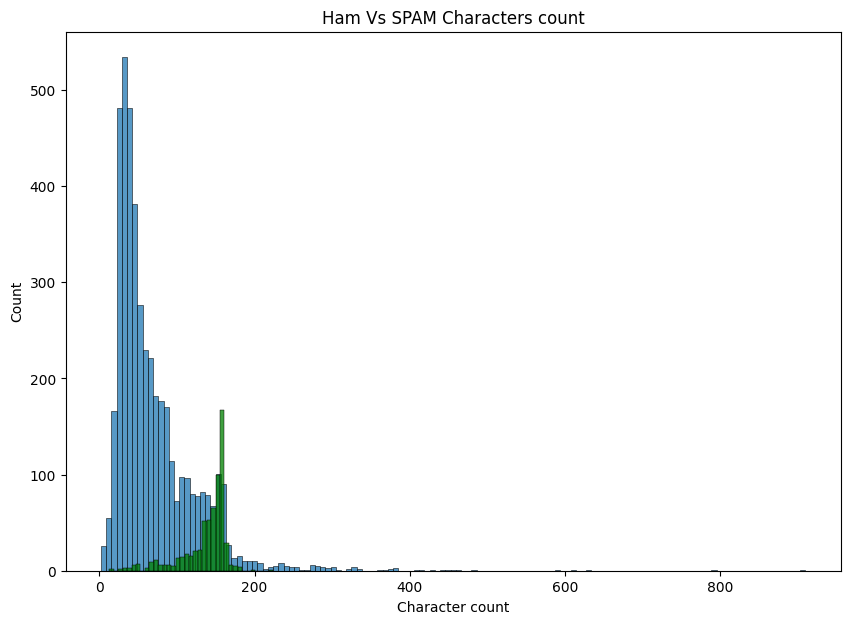

In [131]:
#plotting the histogram for ham and spam for Character count
plt.figure(figsize=(10,7))
plt.title('Ham Vs SPAM Characters count')
sns.histplot(msg[msg['Label']==0]['Character count'])
sns.histplot(msg[msg['Label']==1]['Character count'], color='Green')

<Axes: title={'center': 'Ham Vs SPAM Word count'}, xlabel='Word count', ylabel='Count'>

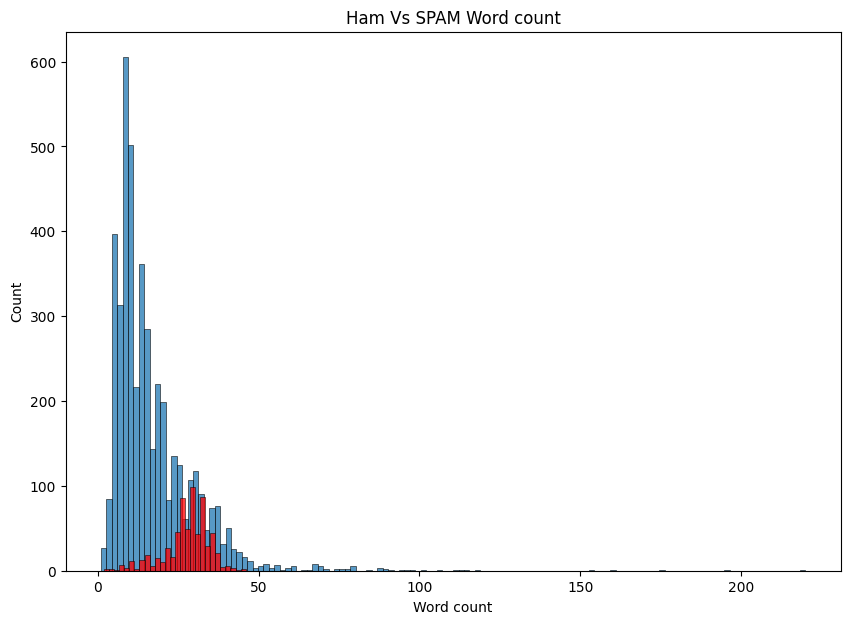

In [130]:
#plotting histogram for ham and spam Word count
plt.figure(figsize=(10,7))
plt.title('Ham Vs SPAM Word count')
sns.histplot(msg[msg['Label']==0]['Word count'])
sns.histplot(msg[msg['Label']==1]['Word count'],color='Red')

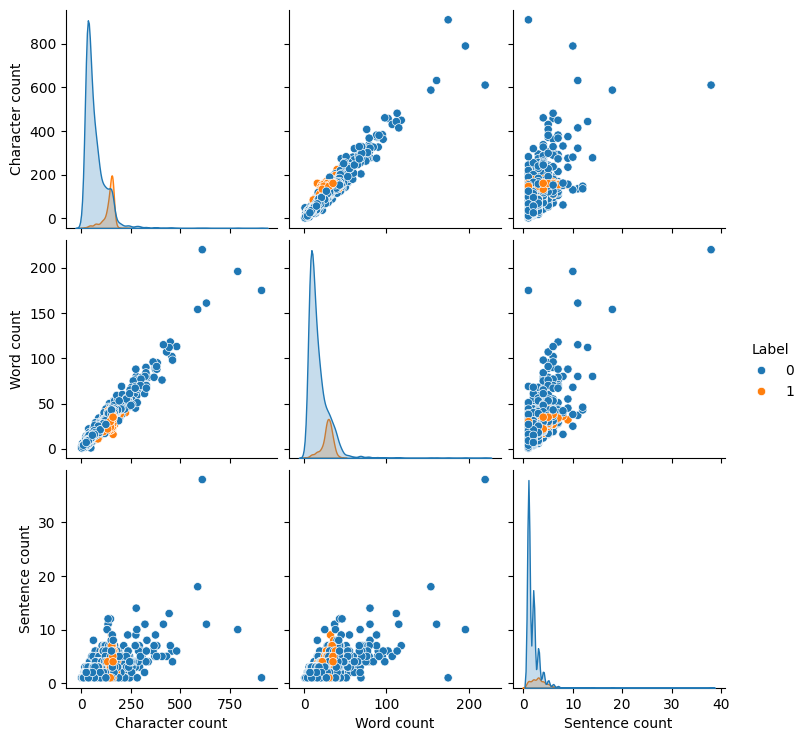

In [133]:
#plotting pairplot 
sns.pairplot(msg,hue='Label')

***3. Data / Text PreProcessing***

In [152]:
#importing libraries

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

nltk.download('stopwords')

ps=PorterStemmer()

def Transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)

    n=[]
    for i in text:
        if i.isalnum():
            n.append(i)

    text=n[:]
    n.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            n.append(i)

    text=n[:]
    n.clear()

    for i in text:
        n.append(ps.stem(i))

    return " ".join(n)

transformed_text=Transform_text('I"m a data scientist, who is very good at Machine Learning  and statistics, analytical knowledge')
print(transformed_text)

data scientist good machin learn statist analyt knowledg


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\navin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [146]:
msg['Message'][143]

'I know you are. Can you pls open the back?'

In [153]:

from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Loving')

'love'

In [155]:
msg['transformed_text']=msg['Message'].apply(Transform_text)
msg.head()

C:\Users\navin\AppData\Local\Temp\ipykernel_14864\2257335430.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  msg['transformed_text']=msg['Message'].apply(Transform_text)


,Label,Message,Character count,Word count,Sentence count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [166]:
#transforming the text in spam
spam_corpus=[]
for mesg in msg[msg['Label']==1]['transformed_text'].tolist():
    for word in mesg.split():
        spam_corpus.append(word)

In [165]:
len(spam_corpus)

9939

In [167]:
#transforming the text in ham
ham_corpus=[]
for mesg in msg[msg['Label']==0]['transformed_text'].tolist():
    for word in mesg.split():
        ham_corpus.append(word)

In [164]:
len(ham_corpus)

35404

In [168]:
msg.head()

,Label,Message,Character count,Word count,Sentence count,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


***4. Building the Model***

In [171]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)

In [172]:
X=tfidf.fit_transform(msg['transformed_text']).toarray()

In [175]:
y=msg['Label'].values

In [178]:
#splitting the data into test and train 
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.2, random_state=2)


In [179]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [181]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [186]:
#checking through GaussianNB()
gnb.fit(Xtrain,ytrain)
ypred=gnb.predict(Xtest)
print(accuracy_score(ytest,ypred))
print(confusion_matrix(ytest,ypred))
print(precision_score(ytest,ypred))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [187]:
#checking through MultinomialNB()
mnb.fit(Xtrain,ytrain)
ypred1=mnb.predict(Xtest)
print(accuracy_score(ytest,ypred1))
print(confusion_matrix(ytest,ypred1))
print(precision_score(ytest,ypred1))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [188]:
#checking through BernoulliNB()
bnb.fit(Xtrain,ytrain)
ypred2=bnb.predict(Xtest)
print(accuracy_score(ytest,ypred2))
print(confusion_matrix(ytest,ypred2))
print(precision_score(ytest,ypred2))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [202]:
#voting Classifier 
from sklearn.svm import SVC
from sklearn.ensemble import ExtraTreesClassifier,VotingClassifier,RandomForestClassifier
svc=SVC(kernel='sigmoid', gamma=1.0, probability=True)
mnb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50, random_state=2)


In [196]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('et',etc)],voting='soft')

In [197]:
voting.fit(Xtrain,ytrain)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [200]:
yprd=voting.predict(Xtest)
print('Accuracy',accuracy_score(ytest,yprd))
print('precision',precision_score(ytest,yprd))

Accuracy 0.9816247582205029
precision 0.9917355371900827


In [203]:
#appling stacking
estimators=('svm',svc),('nb',mnb),('et',etc)
final_estimator=RandomForestClassifier()

In [211]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))

In [212]:
import pickle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB

#sample text data and corresponding labels(replace with actual data)
Xtrain=['Sample text 1','Sample text 2','Sample text 3']
ytrain=[0,1,0] #0 -ve and 1 +ve

#create and traijn Tfidf Vectorisation
tfidf=TfidfVectorizer(lowercase=True, stop_words='english')
Xtrain_tfidf=tfidf.fit_transform(Xtrain)

#create and train Naive Bayes classifier
mnb=MultinomialNB()
mnb.fit(Xtrain_tfidf,ytrain)

#save the trained TF-IDF Vectorizer and Naive Bayes model to files
with open('Vectorizer.pkl','wb') as vectorizer_file:
    pickle.dump(tfidf, vectorizer_file)
with open('model.pkl', 'wb') as model_file:
    pickle.dump(mnb, model_file)